# Introduction

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/marketing_campaign.csv')

## Dataset Description

The dataset contains the following attributes:

### People

- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's education level
- **Marital_Status**: Customer's marital status
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in customer's household
- **Teenhome**: Number of teenagers in customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since customer's last purchase
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

### Products

- **MntWines**: Amount spent on wine in last 2 years
- **MntFruits**: Amount spent on fruits in last 2 years
- **MntMeatProducts**: Amount spent on meat in last 2 years
- **MntFishProducts**: Amount spent on fish in last 2 years
- **MntSweetProducts**: Amount spent on sweets in last 2 years
- **MntGoldProds**: Amount spent on gold in last 2 years

### Promotion

- **NumDealsPurchases**: Number of purchases made with a discount
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made using a catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to company’s website in the last month

In [3]:
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                    --------------  ----- 
 0   ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeat

In [5]:
#df['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'].iloc[0]
#create a new column with name from the column names that are separated by \t
columns = df.columns[0].split('\t')
#loop through the columns string names
column_number = 0
for column in columns:
    #create a new column with the current name of the string
    row_values = []
    for i in range(len(df)):
        row_values.append(df['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'].iloc[i].split('\t')[column_number])
    column_number += 1
    df[column] = row_values
    #fill the new column with the values from the main column that are separated by \t but with the value that belong to it
#drop the main column
df.drop(columns=['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'], inplace=True)

In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
#show all the column of the df
pd.set_option('display.max_columns', None)

In [8]:
#check for null values
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
#check for duplicates
df.duplicated().sum()

0

In [10]:
#drop Z_CostContact and Z_Revenue columns
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)


In [11]:
#check for the data types
df.dtypes

ID                     object
Year_Birth             object
Education              object
Marital_Status         object
Income                 object
Kidhome                object
Teenhome               object
Dt_Customer            object
Recency                object
MntWines               object
MntFruits              object
MntMeatProducts        object
MntFishProducts        object
MntSweetProducts       object
MntGoldProds           object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Response               object
dtype: object

In [12]:
df['Income'] = df['Income'].replace('', np.nan)  # replace empty strings with NaN
df['Income'] = df['Income'].fillna(0)  # fill NaN values with 0

In [13]:
# List of columns to convert to 'int64'
int_cols = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
            'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 
            'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 
            'Response','Income']

# Convert columns to 'int64'
for col in int_cols:
    df[col] = df[col].astype('int64')

# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# List of columns to convert to 'string'
str_cols = ['Education', 'ID']

# Convert columns to 'string'
for col in str_cols:
    df[col] = df[col].astype('string')

In [14]:
df.sort_values(by='Dt_Customer', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
200,7300,1952,Graduation,Divorced,69142,0,1,2014-06-29,50,448,4,34,6,4,39,3,8,1,7,5,0,1,0,0,0,0,0
989,453,1956,PhD,Widow,35340,1,1,2014-06-29,1,27,0,12,0,1,5,2,2,0,3,5,0,0,0,0,0,0,0
1812,8093,1969,Master,Married,79734,0,0,2014-06-28,72,572,8,232,23,62,17,1,4,3,6,1,0,0,0,1,0,0,0
796,6722,1954,PhD,Married,70421,0,1,2014-06-28,98,479,28,136,75,14,35,3,10,3,7,6,0,0,0,0,0,0,0
45,1371,1976,Graduation,Single,79941,0,0,2014-06-28,72,123,164,266,227,30,174,1,2,4,9,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,10001,1985,2n Cycle,Together,7500,1,0,2012-08-01,98,5,17,17,13,14,34,4,2,1,3,9,0,0,0,0,0,0,0
976,2611,1959,Master,Together,82576,0,0,2012-08-01,66,1206,55,445,168,18,18,1,2,4,12,1,0,0,1,0,0,0,0
2194,7118,1957,Graduation,Married,73803,0,1,2012-08-01,61,833,80,363,52,26,174,2,9,5,6,6,1,0,0,0,0,0,1
1363,6181,1950,2n Cycle,Together,52203,0,0,2012-07-31,36,488,21,238,56,108,28,1,8,7,11,6,0,0,0,0,0,0,0


In [15]:
#feature about the number of days since the customer joined

# Get the latest date in 'Dt_Customer'
latest_date = df['Dt_Customer'].max()

# Calculate the number of days since each customer joined
df['Days_Since_Joined'] = (latest_date - df['Dt_Customer']).dt.days

In [16]:
#feature with the age of the customer
df['Age'] = latest_date.year - df['Year_Birth']

In [17]:
#feature with the total spending of the customer
df['Total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [18]:
#featue with the total number of childeren in the household
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [19]:
#feature with the total number of purchases
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [20]:
#feature with the total number of accepted campaigns divided by the total number of campaigns mulitplied by 100
df['Total_Accepted_Campaigns'] = (df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']+ df['Response'])

In [21]:
#Customer Lifetime Value 
#estimation of CLV based on income, total spending,
#and customer engagement metrics. This is a more complex feature 
#but can be very valuable.



In [22]:
# organize the columns
# Define the new order of the columns
column_order = ['ID', 'Year_Birth', 'Age', 'Education', 'Marital_Status', 'Income', 
                'Kidhome', 'Teenhome', 'Total_Children', 'Dt_Customer', 'Days_Since_Joined', 
                 'Recency', 'Complain', 
                'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                'MntSweetProducts', 'MntGoldProds', 'Total_spending', 
                'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                'NumStorePurchases', 'Total_Purchases', 'NumWebVisitsMonth', 
                'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                'AcceptedCmp5', 'Response', 'Total_Accepted_Campaigns']

# Reorder the columns
df = df[column_order]

In [23]:
#renaming the columns to make them more readable
df.rename(columns={
    'ID': 'CustomerID',
    'Year_Birth': 'BirthYear',
    'Dt_Customer': 'EnrollmentDate',
    'Kidhome': 'NumberOfKidsAtHome',
    'Teenhome': 'NumberOfTeensAtHome',
    'Total_Children': 'TotalNumberOfChildren',
    'Days_Since_Joined': 'DaysSinceEnrollment',
    'MntWines': 'AmountSpentOnWines',
    'MntFruits': 'AmountSpentOnFruits',
    'MntMeatProducts': 'AmountSpentOnMeat',
    'MntFishProducts': 'AmountSpentOnFish',
    'MntSweetProducts': 'AmountSpentOnSweets',
    'MntGoldProds': 'AmountSpentOnGold',
    'Total_spending': 'TotalSpending',
    'NumDealsPurchases': 'NumberOfDealsPurchases',
    'NumWebPurchases': 'NumberOfWebPurchases',
    'NumCatalogPurchases': 'NumberOfCatalogPurchases',
    'NumStorePurchases': 'NumberOfStorePurchases',
    'Total_Purchases': 'TotalNumberOfPurchases',
    'NumWebVisitsMonth': 'NumberOfWebVisitsPerMonth',
    'AcceptedCmp1': 'AcceptedCampaign1',
    'AcceptedCmp2': 'AcceptedCampaign2',
    'AcceptedCmp3': 'AcceptedCampaign3',
    'AcceptedCmp4': 'AcceptedCampaign4',
    'AcceptedCmp5': 'AcceptedCampaign5',
    'Response': 'AcceptedLastCampaign',
    'Total_Accepted_Campaigns': 'TotalAcceptedCampaigns',
    'Complain': 'HasComplained'
}, inplace=True)

Int64Index([], dtype='int64')


<AxesSubplot: xlabel='Age'>

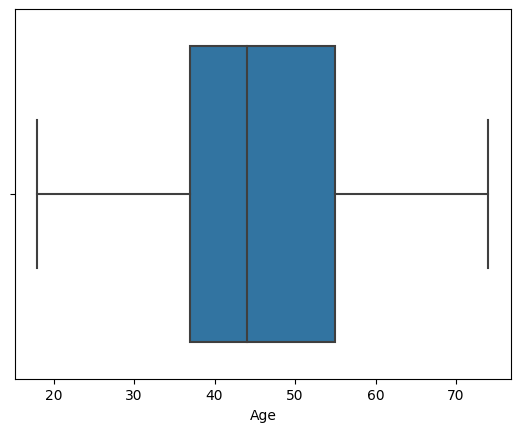

In [24]:
# Keep only the rows where 'Age' is less than or equal to 80
df = df[df['Age'] <= 80]

# Now, print the indices of any rows where 'Age' is still greater than 80 (should be empty)
print(df[df['Age'] > 80].index)

# Check the outliers of the 'Age' feature
sns.boxplot(x=df['Age'])

In [25]:
#save the cleaned data
df.to_csv('dataset/marketing_campaign_cleaned.csv', index=False)

In [26]:
#statistical summary of the data
df.describe()

,BirthYear,Age,Income,NumberOfKidsAtHome,NumberOfTeensAtHome,TotalNumberOfChildren,DaysSinceEnrollment,Recency,HasComplained,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,1968.901654,45.098346,51676.153330,0.444345,0.506482,0.950827,353.790344,49.104604,0.008941,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,605.743406,2.326777,4.087170,2.662494,5.794367,14.870809,5.319177,0.064372,0.013411,0.072865,0.074654,0.072418,0.149307,0.447027
std,11.701917,11.701917,25615.057625,0.538467,0.544593,0.752037,202.137961,28.956073,0.094152,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,601.840466,1.932923,2.779461,2.923456,3.250940,7.676593,2.426386,0.245469,0.115052,0.259974,0.262890,0.259237,0.356471,0.890964
min,1940.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,37.000000,34704.000000,0.000000,0.000000,0.000000,181.000000,24.000000,0.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,69.000000,1.000000,2.000000,0.000000,3.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,44.000000,51039.000000,0.000000,0.000000,1.000000,356.000000,49.000000,0.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000,2.000000,4.000000,2.000000,5.000000,15.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,55.000000,68281.000000,1.000000,1.000000,1.000000,529.000000,74.000000,0.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,1045.000000,3.000000,6.000000,4.000000,8.000000,21.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1996.000000,74.000000,666666.000000,2.000000,2.000000,3.000000,699.000000,99.000000,1.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000,15.000000,27.000000,28.000000,13.000000,44.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


## Descriptive Statistics Insights

### Income Analysis

- **Range:** The income of customers ranges from $0 to $666,666, with a diverse customer base in terms of economic status.
- **Mean Income:** Approximately $51,676, indicating the average economic standing of the customer base.
- **Standard Deviation:** With a standard deviation of $25,615, this indicates significant variability in customer income levels.

### Total Spending Analysis

- **Mean Spending:** Customers spend an average of $605 on products, indicating moderate engagement.
- **Variability:** Total spending shows a broad range ($5 to $2,525) and a high standard deviation (601.84), highlighting diverse purchasing behaviors.

### Purchasing Methods Analysis

- **Web Purchases:** On average, customers make about 4 web purchases, with a range up to 27.
- **Catalog Purchases:** Customers make an average of 2.66 catalog purchases, with a maximum of 28.
- **Store Purchases:** The most common purchasing method, with an average of 5.79 and a maximum of 13.

### Age Distribution

- **Range:** Ages range from 18 to 74, with an average age of 45, suggesting a broad age distribution among customers.

### Campaign Engagement

- **Campaign Participation:** No customer accepted all 6 of the campaigns at the same time, indicating variability in campaign appeal and engagement.

### Activity Insights

- **Recency:** The maximum number of recency is 99 days, meaning the most recently active customers were engaged within the last 100 days.
- **Customer Tenure:** All the customers in the dataset joined in the last 2 years, showing a relatively new customer base.

### Key Insights

- **Customer Diversity:** The dataset showcases a wide range of customers in terms of income, age, and spending behavior, indicating a diverse customer base.
- **Purchasing Preferences:** Store purchases are the most common, followed by web and then catalog purchases, suggesting that different channels may appeal to different segments of the customer base.
- **Spending Behavior:** The significant variability in total spending points to diverse customer engagement levels, from low to high spenders, which could influence marketing strategies.


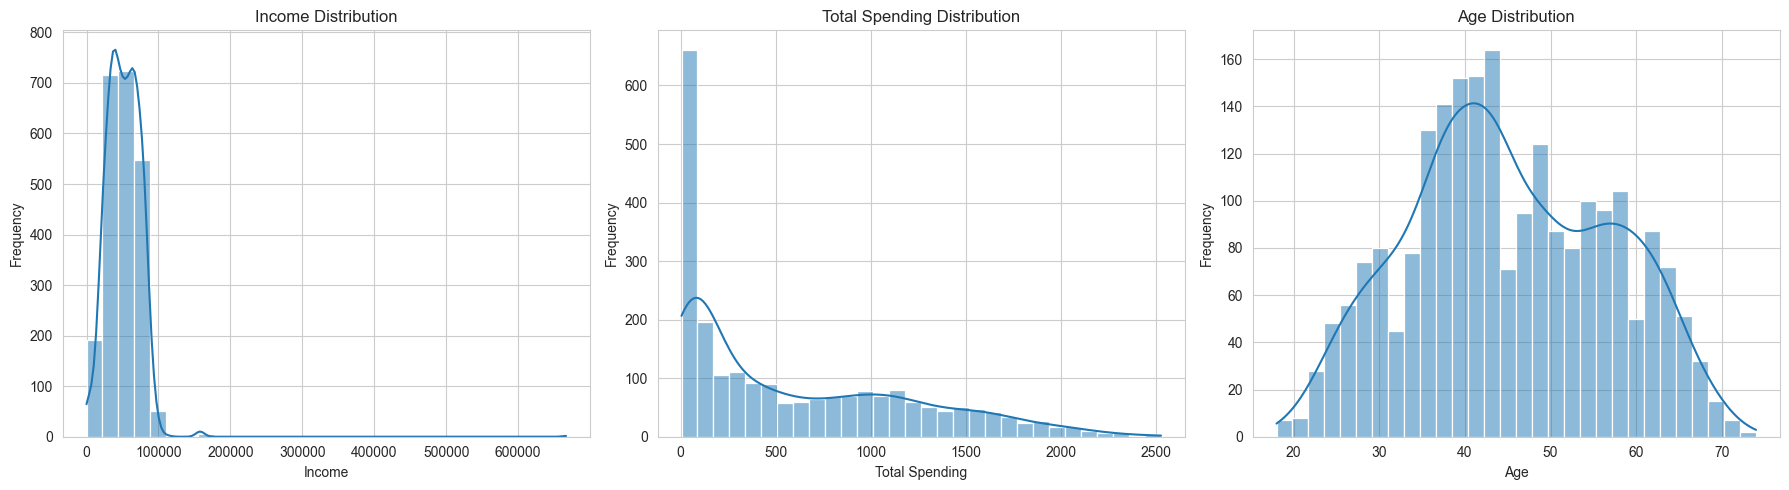

In [27]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histograms for Income, TotalSpending, and Age
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Income Distribution
sns.histplot(df['Income'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Income Distribution')
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Frequency')

# Total Spending Distribution
sns.histplot(df['TotalSpending'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Total Spending Distribution')
ax[1].set_xlabel('Total Spending')
ax[1].set_ylabel('Frequency')

# Age Distribution
sns.histplot(df['Age'], bins=30, kde=True, ax=ax[2])
ax[2].set_title('Age Distribution')
ax[2].set_xlabel('Age')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

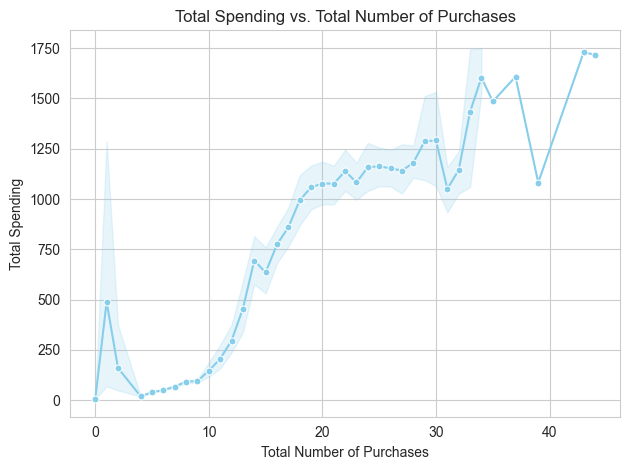

In [28]:
df[['TotalNumberOfPurchases', 'TotalSpending']].corr()
sns.lineplot(x='TotalNumberOfPurchases', y='TotalSpending', data=df, marker='o', markersize=5, color='skyblue')
plt.title('Total Spending vs. Total Number of Purchases')
plt.xlabel('Total Number of Purchases')
plt.ylabel('Total Spending')
plt.tight_layout()
plt.show()

In [29]:
high_spending_threshold = df['TotalSpending'].quantile(0.75) # Top 25% spenders
high_spenders = df[df['TotalSpending'] >= 300]

print(high_spenders.shape)

(1213, 33)


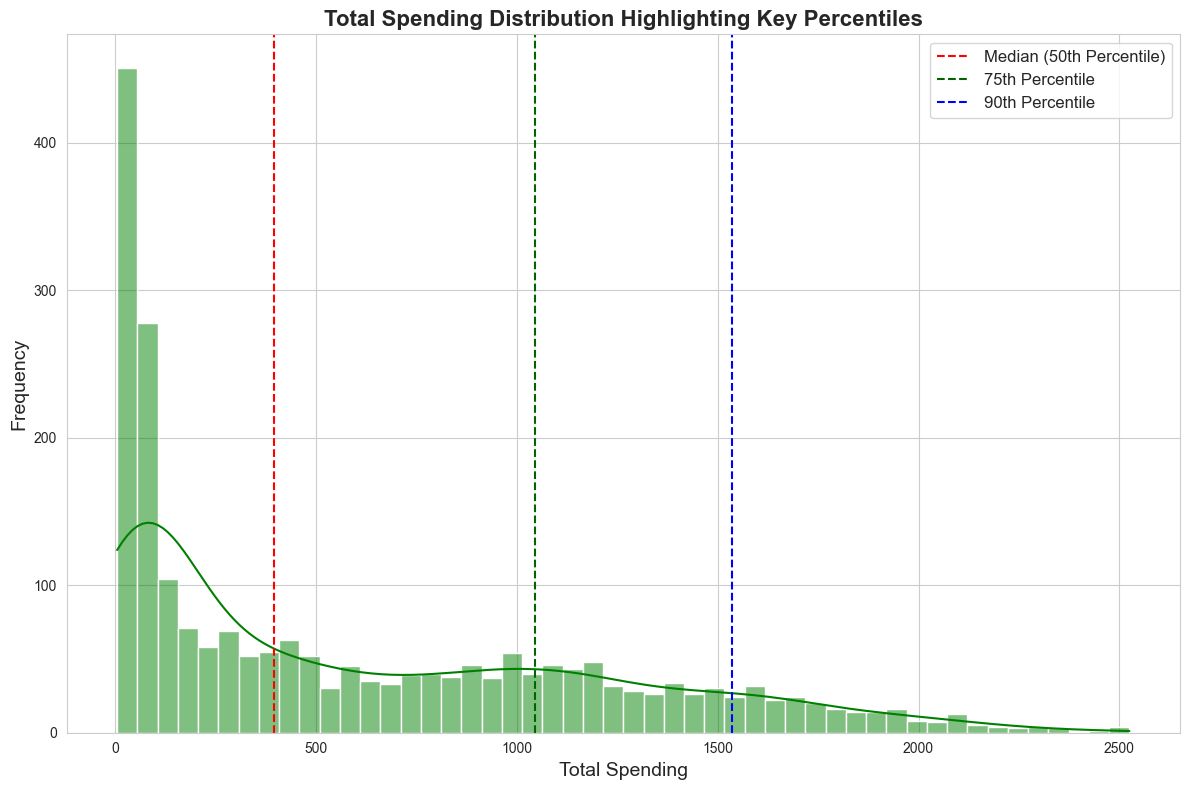

      TotalSpending
0.25           69.0
0.50          396.0
0.75         1045.0
0.90         1536.0
0.95         1767.2


In [30]:
# Calculate specific percentiles for Total Spending
total_spending_percentiles = df['TotalSpending'].quantile([0.25, 0.5, 0.75, 0.9, 0.95]).to_frame()

# Visualize the Total Spending distribution, emphasizing critical ranges
plt.figure(figsize=(12, 8))  # Slightly larger for better readability
sns.histplot(df['TotalSpending'], bins=50, kde=True, color='green')  # Softer color with transparency
plt.title('Total Spending Distribution Highlighting Key Percentiles', fontsize=16, fontweight='bold')
plt.axvline(df['TotalSpending'].quantile(0.5), color='red', linestyle='--', label='Median (50th Percentile)')
plt.axvline(df['TotalSpending'].quantile(0.75), color='darkgreen', linestyle='--', label='75th Percentile')
plt.axvline(df['TotalSpending'].quantile(0.9), color='blue', linestyle='--', label='90th Percentile')

plt.xlabel('Total Spending', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Display the calculated percentiles in a more readable format
print(total_spending_percentiles)

In [31]:
# Defining high-spending customers based on the 90th percentile threshold
# Define high spenders based on the 90th percentile of TotalSpending
high_spending_threshold = df['TotalSpending'].quantile(0.90)
high_spenders = df[df['TotalSpending'] >= high_spending_threshold]
low_spenders = df[df['TotalSpending'] < high_spending_threshold]

# Analyzing the demographics and purchasing behaviors of the high-spending segment
high_spenders_90_descriptive_stats = high_spenders[['Income', 'Age', 'TotalSpending', 'NumberOfWebPurchases', 
                                                       'NumberOfCatalogPurchases', 'NumberOfStorePurchases']].describe()

# Analyzing campaign responses
campaign_responses = ['AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 
                      'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedLastCampaign']
campaign_response_stats = high_spenders[campaign_responses].mean()
high_spenders_90_descriptive_stats, campaign_response_stats

(              Income         Age  TotalSpending  NumberOfWebPurchases  \
 count     225.000000  225.000000     225.000000            225.000000   
 mean    79104.697778   45.173333    1824.213333              5.266667   
 std     16434.230803   13.125126     228.830526              2.267787   
 min         0.000000   20.000000    1536.000000              0.000000   
 25%     72335.000000   35.000000    1638.000000              4.000000   
 50%     79930.000000   44.000000    1766.000000              5.000000   
 75%     84906.000000   56.000000    1957.000000              7.000000   
 max    160803.000000   73.000000    2525.000000             11.000000   
 
        NumberOfCatalogPurchases  NumberOfStorePurchases  
 count                225.000000              225.000000  
 mean                   6.435556                8.133333  
 std                    3.548966                2.992550  
 min                    0.000000                0.000000  
 25%                    5.000000     

In [32]:
# Education Levels
education_levels_high_spenders = high_spenders['Education'].value_counts(normalize=True) * 100

# Marital Status
marital_status_high_spenders = high_spenders['Marital_Status'].value_counts(normalize=True) * 100

education_levels_high_spenders, marital_status_high_spenders

(Graduation    50.222222
 PhD           25.333333
 Master             20.0
 2n Cycle       4.444444
 Name: Education, dtype: Float64,
 Married     35.111111
 Together    27.111111
 Single      24.000000
 Divorced     9.777778
 Widow        4.000000
 Name: Marital_Status, dtype: float64)

In [33]:
# Re-analyzing family composition specifically focusing on the number of children at home for high spenders vs. overall customer base
family_composition_overall = df[['NumberOfKidsAtHome', 'NumberOfTeensAtHome']].mean()
family_composition_high_spenders = high_spenders[['NumberOfKidsAtHome', 'NumberOfTeensAtHome']].mean()

# Comparing the family composition of high spenders to the overall customer base
family_composition_comparison = pd.DataFrame({
    'Overall Customer Base': family_composition_overall,
    'High Spenders': family_composition_high_spenders
})

family_composition_comparison


,Overall Customer Base,High Spenders
NumberOfKidsAtHome,0.444345,0.057778
NumberOfTeensAtHome,0.506482,0.155556


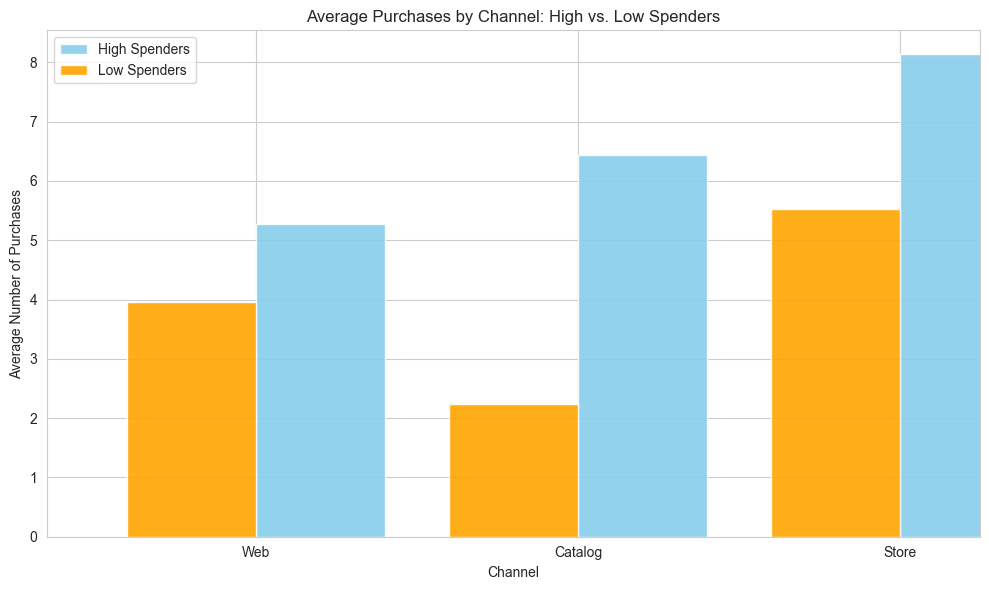

(NumberOfWebPurchases        5.266667
 NumberOfCatalogPurchases    6.435556
 NumberOfStorePurchases      8.133333
 dtype: float64,
 NumberOfWebPurchases        3.955268
 NumberOfCatalogPurchases    2.240557
 NumberOfStorePurchases      5.532803
 dtype: float64)

In [34]:
# Calculate average number of purchases through each channel for high and low spenders
avg_purchases_high = high_spenders[['NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases']].mean()
avg_purchases_low = low_spenders[['NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases']].mean()

# Plotting the comparison
plt.figure(figsize=(10, 6))
avg_purchases_high.plot(kind='bar', color='skyblue', label='High Spenders', alpha=0.9, position=0, width=0.4)
avg_purchases_low.plot(kind='bar', color='orange', label='Low Spenders', alpha=0.9, position=1, width=0.4)
plt.title('Average Purchases by Channel: High vs. Low Spenders')
plt.xlabel('Channel')
plt.ylabel('Average Number of Purchases')
plt.xticks(ticks=[0, 1, 2], labels=['Web', 'Catalog', 'Store'], rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

(avg_purchases_high, avg_purchases_low)

<Figure size 1200x600 with 0 Axes>

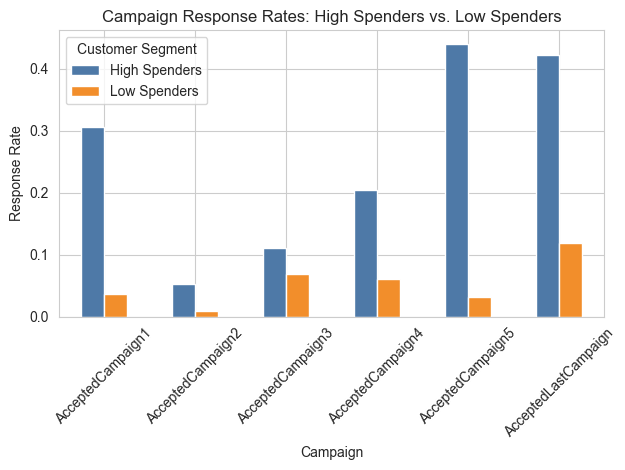

,High Spenders,Low Spenders
AcceptedCampaign1,0.306667,0.037276
AcceptedCampaign2,0.053333,0.008946
AcceptedCampaign3,0.111111,0.068588
AcceptedCampaign4,0.204444,0.060139
AcceptedCampaign5,0.440000,0.031312
AcceptedLastCampaign,0.422222,0.118787


In [35]:
campaign_columns = ['AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 
                    'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedLastCampaign']
campaign_engagement_high_spenders = high_spenders[campaign_columns].mean()
# Calculate average response rates to each campaign for low spenders
campaign_engagement_low_spenders = low_spenders[campaign_columns].mean()

# Comparing campaign response rates between high spenders and low spenders
campaign_response_comparison = pd.DataFrame({
    'High Spenders': campaign_engagement_high_spenders,
    'Low Spenders': campaign_engagement_low_spenders
})

# Visualizing the comparison
plt.figure(figsize=(12, 6))
campaign_response_comparison.plot(kind='bar', color=['#4e79a7', '#f28e2b'])
plt.title('Campaign Response Rates: High Spenders vs. Low Spenders')
plt.xlabel('Campaign')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()

campaign_response_comparison


## Analysis of High Spenders

### Income Characteristics

- **Average Income:** The average income of high spenders is approximately $79,105, showing that this group has a higher financial capacity.
- **Standard Deviation:** With a standard deviation of $16,434, there's noticeable variability within this group's income.
- **Income Range:** Extends from $0 (likely due to data anomalies) to $160,803, indicating a wide range of income levels even within high spenders.

### Age Distribution

- **Average Age:** About 45 years, suggesting that high spenders are spread across a broad age spectrum.
- **Age Range:** From 20 to 73 years, highlighting the diversity in age within this segment.

### Total Spending

- **Average Spending:** High spenders invest about $1,824 on average in purchases, indicating their significant contribution to overall revenue.
- **Spending Range:** From $1,536 to $2,525, underscoring the high financial engagement of this group.

### Purchasing Behaviors

- High spenders demonstrate strong engagement across all purchasing channels, with a notable preference for catalog and store purchases in addition to web purchases.

### Campaign Response Rates

- **High Engagement:** This segment shows particularly high engagement with marketing campaigns, especially the 5th campaign (44%) and the last campaign (42.2%), suggesting that targeted marketing efforts are very effective with this group.

### Insights and Strategic Implications

- **Targeted Marketing:** The high response rates to certain campaigns underscore the effectiveness of personalized, well-targeted marketing strategies for engaging this segment.
- **Investment in High-Value Segments:** Given their significant spending and responsiveness to campaigns, focusing resources on retaining and further engaging high spenders could yield substantial returns on investment.
- **Demographic and Behavioral Profiling:** The broad age range but high income of this segment reinforces the importance of targeting based on financial capacity and purchasing behaviors rather than demographic factors alone.


In [36]:
# Analyzing broader demographic characteristics of the entire customer base
demographic_columns = ['Education', 'Marital_Status', 'NumberOfKidsAtHome', 'NumberOfTeensAtHome','TotalNumberOfChildren']
demographic_analysis = df[demographic_columns].describe(include='all')

# Analyzing the distribution of education levels and marital status
education_distribution = df['Education'].value_counts(normalize=True) * 100
marital_status_distribution = df['Marital_Status'].value_counts(normalize=True) * 100

demographic_analysis, education_distribution, marital_status_distribution


(         Education Marital_Status  NumberOfKidsAtHome  NumberOfTeensAtHome  \
 count         2237           2237         2237.000000          2237.000000   
 unique           5              8                 NaN                  NaN   
 top     Graduation        Married                 NaN                  NaN   
 freq          1127            864                 NaN                  NaN   
 mean           NaN            NaN            0.444345             0.506482   
 std            NaN            NaN            0.538467             0.544593   
 min            NaN            NaN            0.000000             0.000000   
 25%            NaN            NaN            0.000000             0.000000   
 50%            NaN            NaN            0.000000             0.000000   
 75%            NaN            NaN            1.000000             1.000000   
 max            NaN            NaN            2.000000             2.000000   
 
         TotalNumberOfChildren  
 count           

In [37]:

#demographic_analysis = high_spenders[demographic_columns].describe(include='all')

# Analyzing the distribution of education levels and marital status
education_distribution = high_spenders['Education'].value_counts(normalize=True) * 100
marital_status_distribution = high_spenders['Marital_Status'].value_counts(normalize=True) * 100
education_distribution, marital_status_distribution


(Graduation    50.222222
 PhD           25.333333
 Master             20.0
 2n Cycle       4.444444
 Name: Education, dtype: Float64,
 Married     35.111111
 Together    27.111111
 Single      24.000000
 Divorced     9.777778
 Widow        4.000000
 Name: Marital_Status, dtype: float64)

In [38]:
education_distribution = low_spenders['Education'].value_counts(normalize=True) * 100
marital_status_distribution = low_spenders['Marital_Status'].value_counts(normalize=True) * 100
education_distribution, marital_status_distribution

(Graduation    50.397614
 PhD           21.272366
 Master        16.153082
 2n Cycle       9.493042
 Basic          2.683897
 Name: Education, dtype: Float64,
 Married     39.015905
 Together    25.745527
 Single      21.123260
 Divorced    10.387674
 Widow        3.379722
 Alone        0.149105
 Absurd       0.099404
 YOLO         0.099404
 Name: Marital_Status, dtype: float64)

## Broader Demographic Analysis of the Customer Base

Our analysis provides insights into the education levels, marital status, and family structure of the customer base, revealing patterns that could inform strategic marketing and product development decisions.

### Education Distribution

- **Graduation:** Represents the largest group, with approximately 50.38% of customers holding a graduation degree.
- **PhD:** The second-largest group, with about 21.68% of customers.
- **Master:** Accounts for 16.54% of the customer base.
- **2n Cycle and Basic:** Smaller segments, with 8.98% and 2.41% respectively, indicating a less common level of educational attainment.

### Marital Status Distribution

- **Married:** The most common marital status, comprising 38.62% of customers.
- **Together:** Represents 25.88% of the customer base, indicating customers living with a partner but not married.
- **Single:** Accounts for 21.41%, highlighting a significant portion of the customer base that is not in a formal relationship.
- **Divorced and Widow:** Smaller segments, with 10.33% and 3.44% respectively, showing less representation in the customer base.

### Family Structure

- **NumberOfKidsAtHome and NumberOfTeensAtHome:** The distributions suggest a balanced presence of families with and without children at home. With means slightly less than 0.5 for both metrics, many customers likely have either one kid or teen at home.

## Strategic Implications

- **Educational Attainment:** The high percentage of customers with higher education (Graduation, PhD, Master) suggests a well-educated customer base. This demographic may have specific product preferences and respond differently to marketing communication strategies, emphasizing the importance of tailoring messages to this educated audience.
- **Marital and Family Status:** The diversity in marital statuses and the presence of children or teens at home indicate varied household needs and purchasing behaviors. This insight allows for marketing strategies and product offerings to be more effectively tailored to meet these differing needs. For example, targeting family-oriented products or services could be particularly beneficial for segments of the customer base with children.


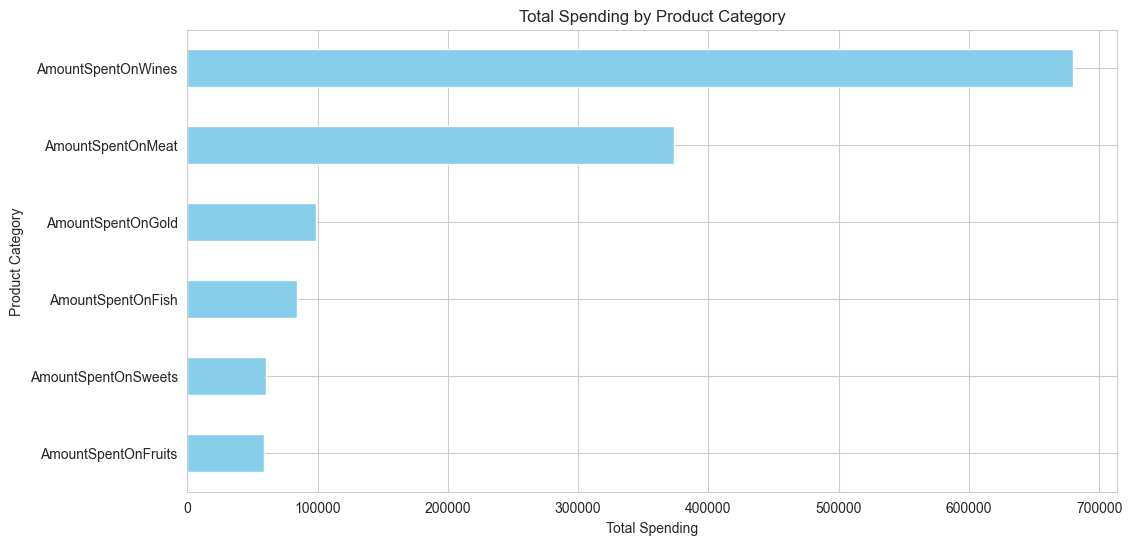

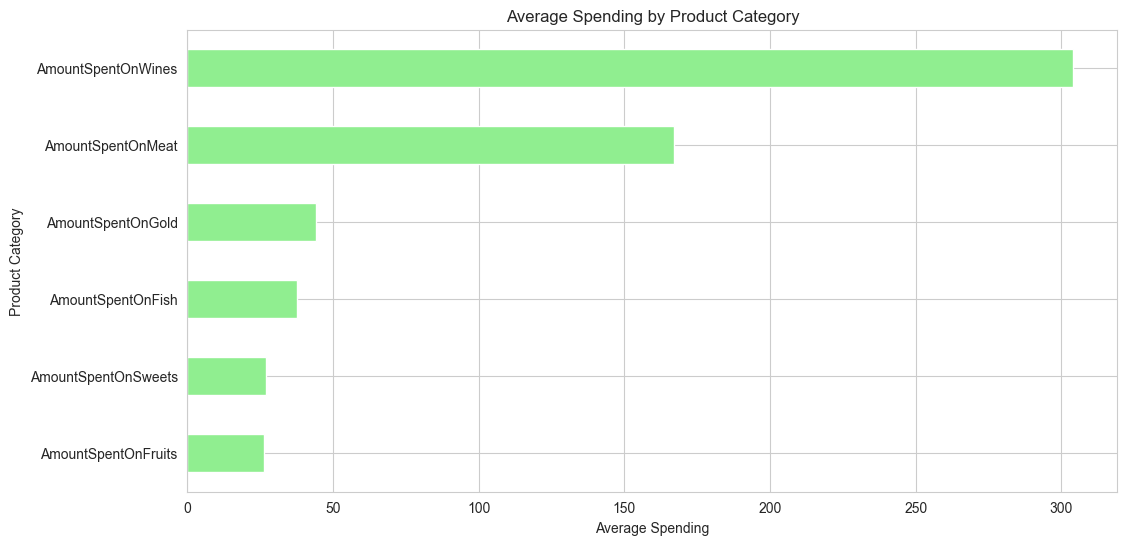

(AmountSpentOnWines     680038
 AmountSpentOnFruits     58767
 AmountSpentOnMeat      373393
 AmountSpentOnFish       83939
 AmountSpentOnSweets     60553
 AmountSpentOnGold       98358
 dtype: int64,
 AmountSpentOnWines     303.995530
 AmountSpentOnFruits     26.270451
 AmountSpentOnMeat      166.916853
 AmountSpentOnFish       37.523022
 AmountSpentOnSweets     27.068842
 AmountSpentOnGold       43.968708
 dtype: float64)

In [39]:
product_categories = ['AmountSpentOnWines', 'AmountSpentOnFruits', 'AmountSpentOnMeat', 
                      'AmountSpentOnFish', 'AmountSpentOnSweets', 'AmountSpentOnGold']

# Calculating total and average spending in each product category
total_spending_by_category = df[product_categories].sum()
average_spending_by_category = df[product_categories].mean()

# Visualizing total spending in each product category
plt.figure(figsize=(12, 6))
total_spending_by_category.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Spending by Product Category')
plt.xlabel('Total Spending')
plt.ylabel('Product Category')
plt.show()

# Visualizing average spending in each product category
plt.figure(figsize=(12, 6))
average_spending_by_category.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Average Spending by Product Category')
plt.xlabel('Average Spending')
plt.ylabel('Product Category')
plt.show()

total_spending_by_category, average_spending_by_category

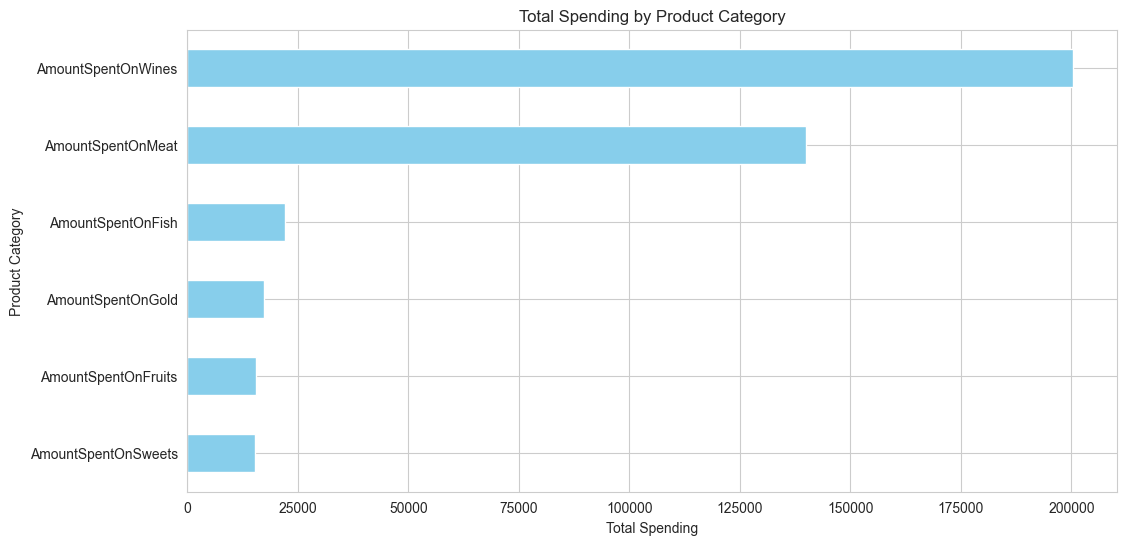

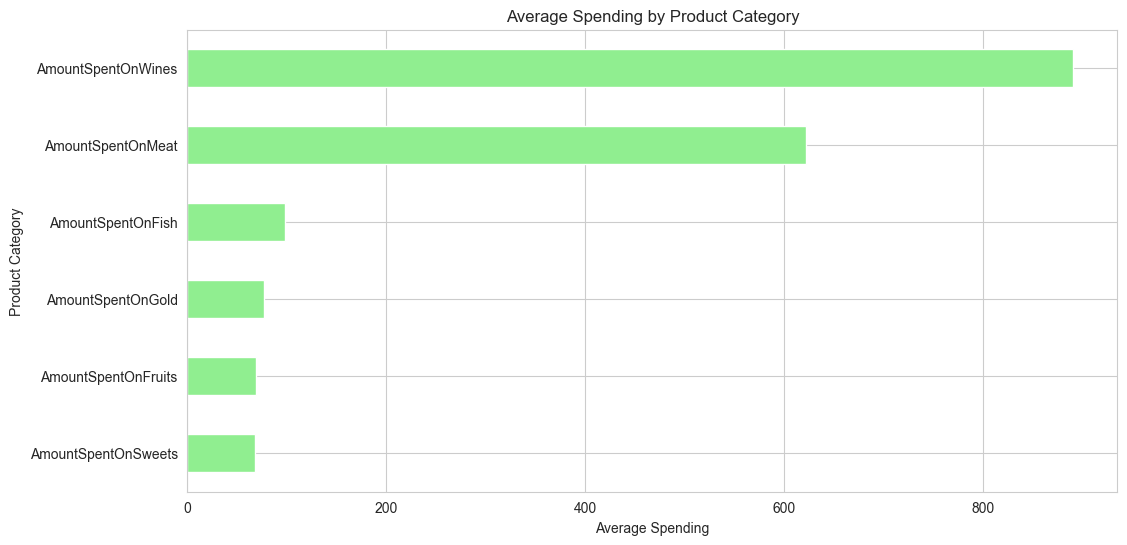

(AmountSpentOnWines     200380
 AmountSpentOnFruits     15540
 AmountSpentOnMeat      139836
 AmountSpentOnFish       22064
 AmountSpentOnSweets     15262
 AmountSpentOnGold       17366
 dtype: int64,
 AmountSpentOnWines     890.577778
 AmountSpentOnFruits     69.066667
 AmountSpentOnMeat      621.493333
 AmountSpentOnFish       98.062222
 AmountSpentOnSweets     67.831111
 AmountSpentOnGold       77.182222
 dtype: float64)

In [40]:
product_categories = ['AmountSpentOnWines', 'AmountSpentOnFruits', 'AmountSpentOnMeat', 
                      'AmountSpentOnFish', 'AmountSpentOnSweets', 'AmountSpentOnGold']

# Calculating total and average spending in each product category
total_spending_by_category = high_spenders[product_categories].sum()
average_spending_by_category = high_spenders[product_categories].mean()

# Visualizing total spending in each product category
plt.figure(figsize=(12, 6))
total_spending_by_category.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Spending by Product Category')
plt.xlabel('Total Spending')
plt.ylabel('Product Category')
plt.show()

# Visualizing average spending in each product category
plt.figure(figsize=(12, 6))
average_spending_by_category.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Average Spending by Product Category')
plt.xlabel('Average Spending')
plt.ylabel('Product Category')
plt.show()

total_spending_by_category, average_spending_by_category

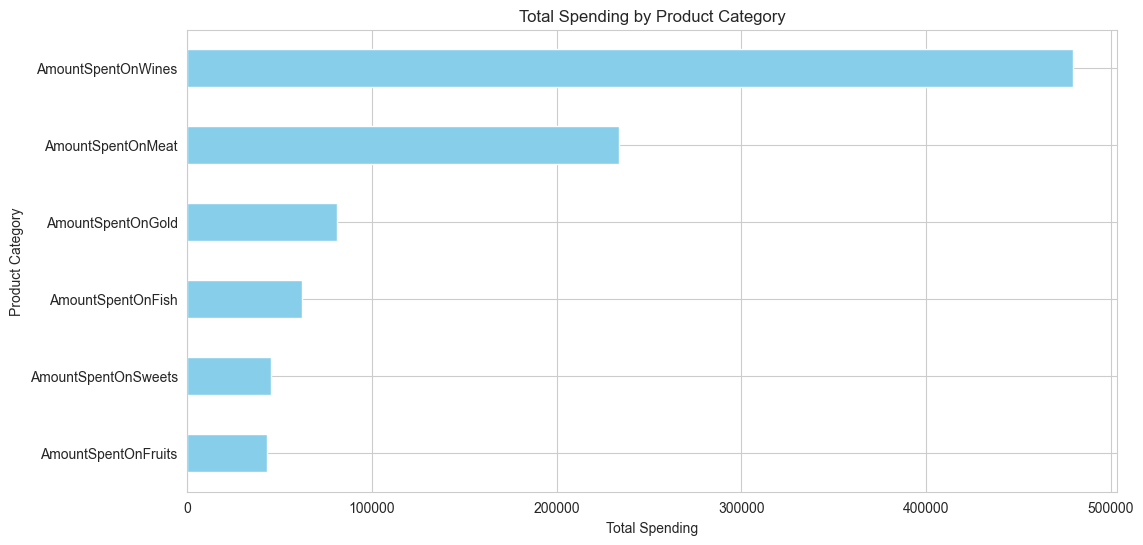

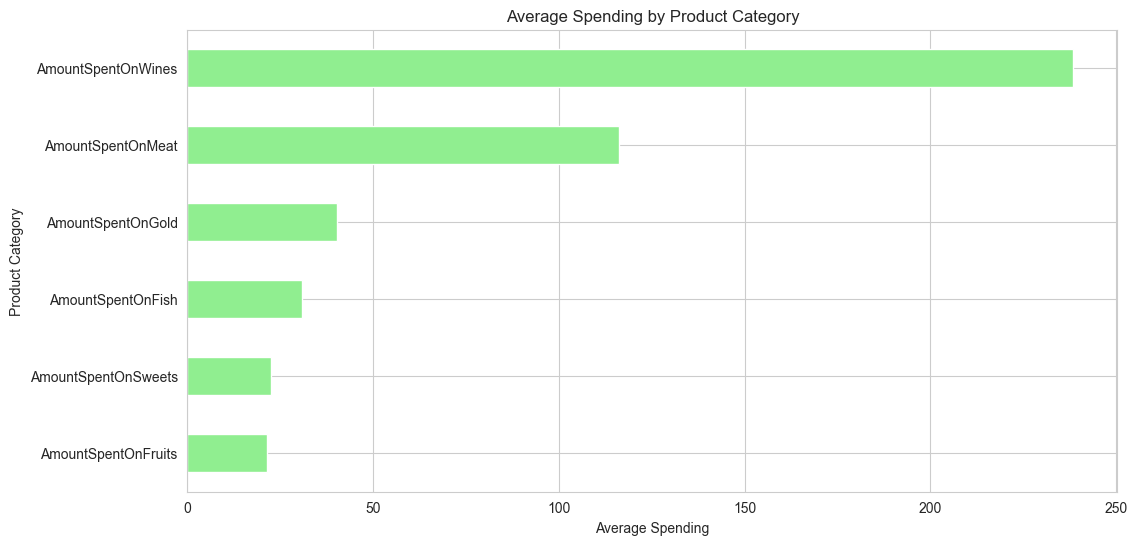

(AmountSpentOnWines     479658
 AmountSpentOnFruits     43227
 AmountSpentOnMeat      233557
 AmountSpentOnFish       61875
 AmountSpentOnSweets     45291
 AmountSpentOnGold       80992
 dtype: int64,
 AmountSpentOnWines     238.398608
 AmountSpentOnFruits     21.484592
 AmountSpentOnMeat      116.082008
 AmountSpentOnFish       30.752982
 AmountSpentOnSweets     22.510437
 AmountSpentOnGold       40.254473
 dtype: float64)

In [41]:
product_categories = ['AmountSpentOnWines', 'AmountSpentOnFruits', 'AmountSpentOnMeat', 
                      'AmountSpentOnFish', 'AmountSpentOnSweets', 'AmountSpentOnGold']

# Calculating total and average spending in each product category
total_spending_by_category = low_spenders[product_categories].sum()
average_spending_by_category = low_spenders[product_categories].mean()

# Visualizing total spending in each product category
plt.figure(figsize=(12, 6))
total_spending_by_category.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Spending by Product Category')
plt.xlabel('Total Spending')
plt.ylabel('Product Category')
plt.show()

# Visualizing average spending in each product category
plt.figure(figsize=(12, 6))
average_spending_by_category.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Average Spending by Product Category')
plt.xlabel('Average Spending')
plt.ylabel('Product Category')
plt.show()

total_spending_by_category, average_spending_by_category

## Summary of Spending by Product Category

### Total Spending by Category

- **Wines:** Lead significantly in total spending, with a total of $680,038.
- **Meat:** The second highest category, with total spending at $373,393.
- **Other Categories:** Gold, Fish, Fruits, and Sweets follow, with lower total spending in that order, indicating varied customer preferences.

### Average Spending by Category

- **Wines and Meat:** Customers spend the most on average in these categories (approximately $304 for Wines and $167 for Meat).
- **Lower Spending Categories:** Gold, Fish, Sweets, and Fruits see lower average spending, which highlights different levels of interest or necessity.

### Insights and Strategic Implications

- **Product Focus:** The high spending on meat suggests these are key areas for inventory expansion, targeted marketing, or promotional efforts.
- **Customer Preferences:** The variance in spending across categories underscores the diversity in customer preferences, useful for guiding product development, bundling, and cross-selling strategies.
- **Marketing Strategies:** Knowledge of which categories attract more spending can enhance marketing messages and offers, particularly for high-value categories like wines and meat.


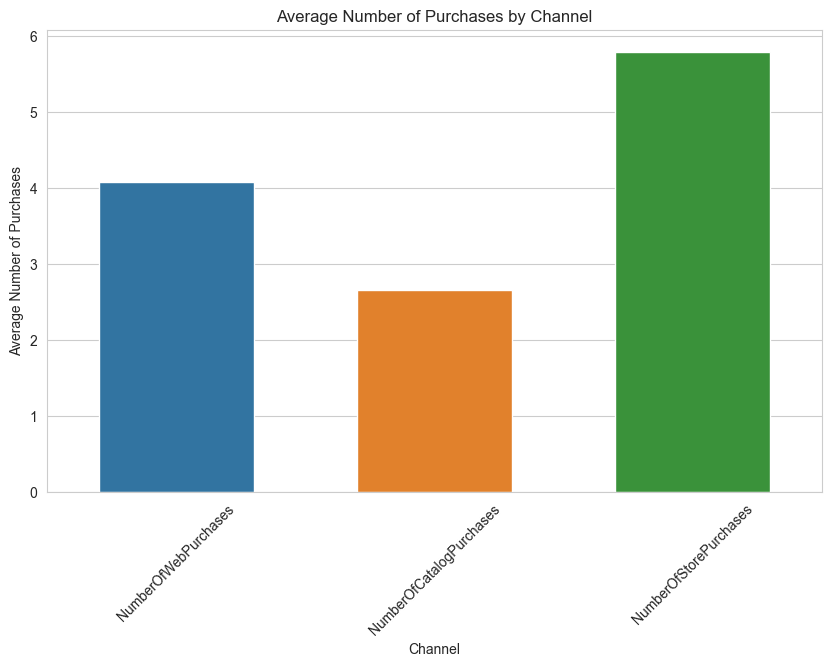

(count    2237.000000
 mean       14.870809
 std         7.676593
 min         0.000000
 25%         8.000000
 50%        15.000000
 75%        21.000000
 max        44.000000
 Name: TotalNumberOfPurchases, dtype: float64,
 NumberOfWebPurchases        4.087170
 NumberOfCatalogPurchases    2.662494
 NumberOfStorePurchases      5.794367
 dtype: float64)

In [42]:
#Analyze Purchase Frequency
purchase_frequency_stats = df['TotalNumberOfPurchases'].describe()

#Channel Preferences - Calculating and visualizing channel usage
channel_preferences = df[['NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases']].mean()

# Visualizing channel preferences
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_preferences.index, y=channel_preferences.values,width=0.6)
plt.title('Average Number of Purchases by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Number of Purchases')
plt.xticks(rotation=45)
plt.show()

purchase_frequency_stats, channel_preferences


In [43]:

# Identify variables related to purchasing methods
purchasing_columns = ['NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases', 'TotalNumberOfPurchases']

# Calculate descriptive statistics for each purchasing method
descriptive_statistics_purchases = df[purchasing_columns].describe()

descriptive_statistics_purchases.loc[['mean', 'min', 'max'], :]

,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases
mean,4.08717,2.662494,5.794367,14.870809
min,0.00000,0.000000,0.000000,0.000000
max,27.00000,28.000000,13.000000,44.000000


### Purchase Frequency Analysis
-**Average Total Purchases:** Customers make an average of approximately 14.87 purchases, with a standard deviation of 7.68, indicating variability in how active customers are.

-**Range:** The total number of purchases ranges from 0 to 44, showcasing a wide spectrum of customer engagement levels.

### Strategic Implications


-**Targeted Marketing:** Knowing which channels customers prefer can help tailor marketing efforts more effectively. For instance, enhancing the online shopping experience or promoting in-store exclusives.

-**Customer Engagement:** The variability in purchase frequency indicates opportunities for increasing engagement among less active customers, potentially through personalized offers or loyalty programs.

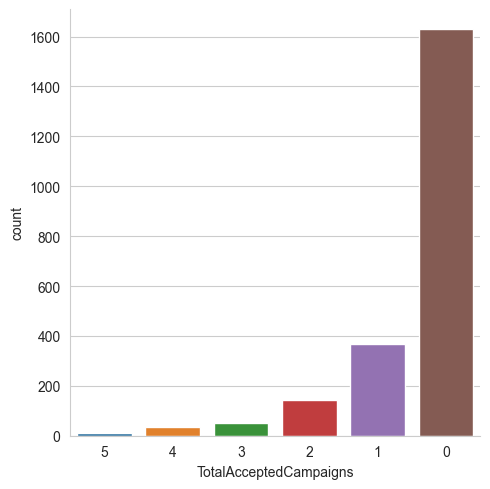

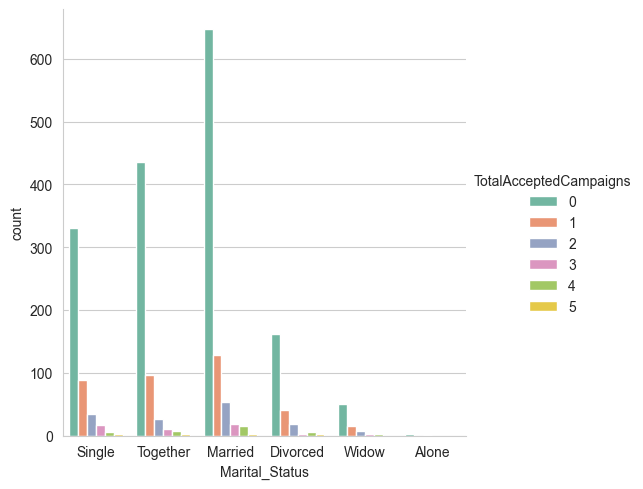

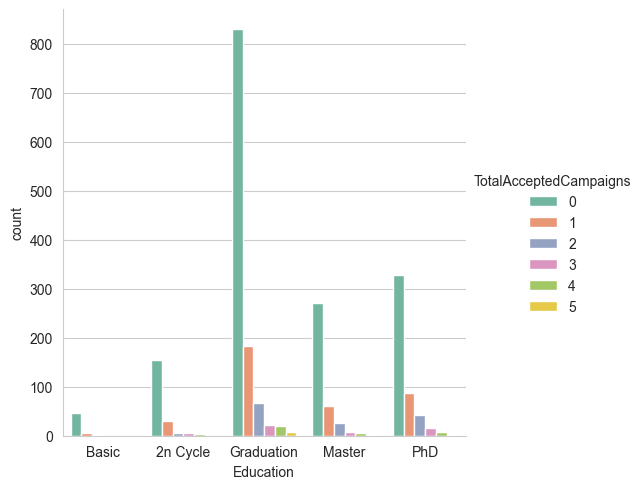

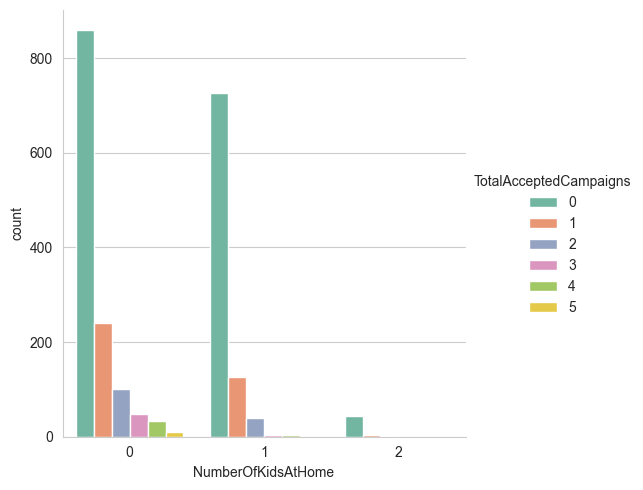

In [44]:
#sns countplot for the TotalacceptedCampaigns feature using catplot
#change the order of the x axis to be in ascending order in the graph
sns.catplot(x='TotalAcceptedCampaigns', data=df, kind='count',order=[5,4,3,2,1,0])
plt.show()
#sns countplot for the TotalacceptedCampaigns feature and the Marital_Status feature using catplot
sns.catplot(x='Marital_Status', data=df, kind='count', order=['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone'], hue='TotalAcceptedCampaigns', palette='Set2')
#sns countplot for the TotalacceptedCampaigns feature and the Education feature using catplot
sns.catplot(x='Education', data=df, kind='count', order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], hue='TotalAcceptedCampaigns', palette='Set2')
#create a complete analysis on what makes a customer accept a campaign
#sns countplot for the TotalacceptedCampaigns feature and the NumberOfKidsAtHome feature using catplot
sns.catplot(x='NumberOfKidsAtHome', data=df, kind='count', hue='TotalAcceptedCampaigns', palette='Set2')

<AxesSubplot: xlabel='Age'>

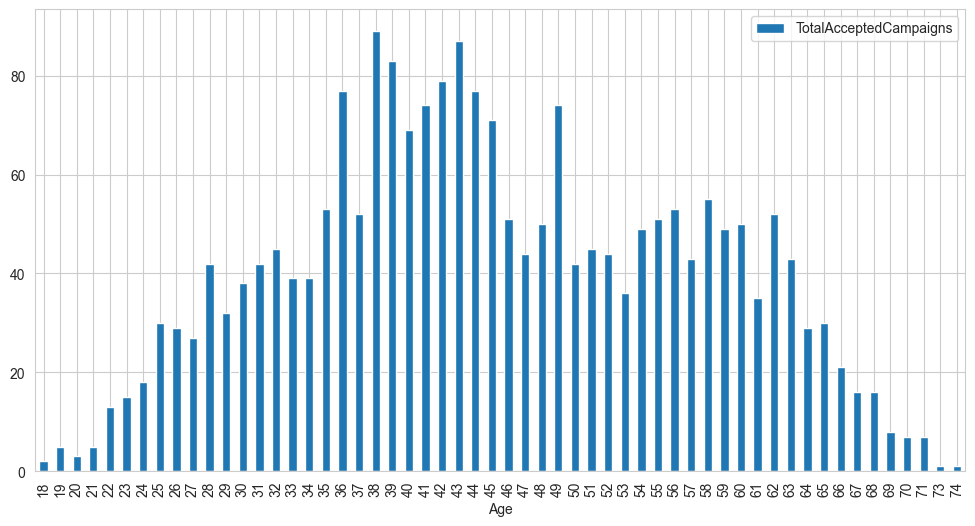

In [45]:
#print(df[['Age', 'TotalAcceptedCampaigns']].groupby('Age').agg(['count', 'mean','median']))

df[['Age', 'TotalAcceptedCampaigns']].groupby('Age').count().plot(kind='bar', figsize=(12, 6))

C:/Users/USCS/AppData/Local/Temp/xpython_16968/435293474.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_subset = df_subset.corr()


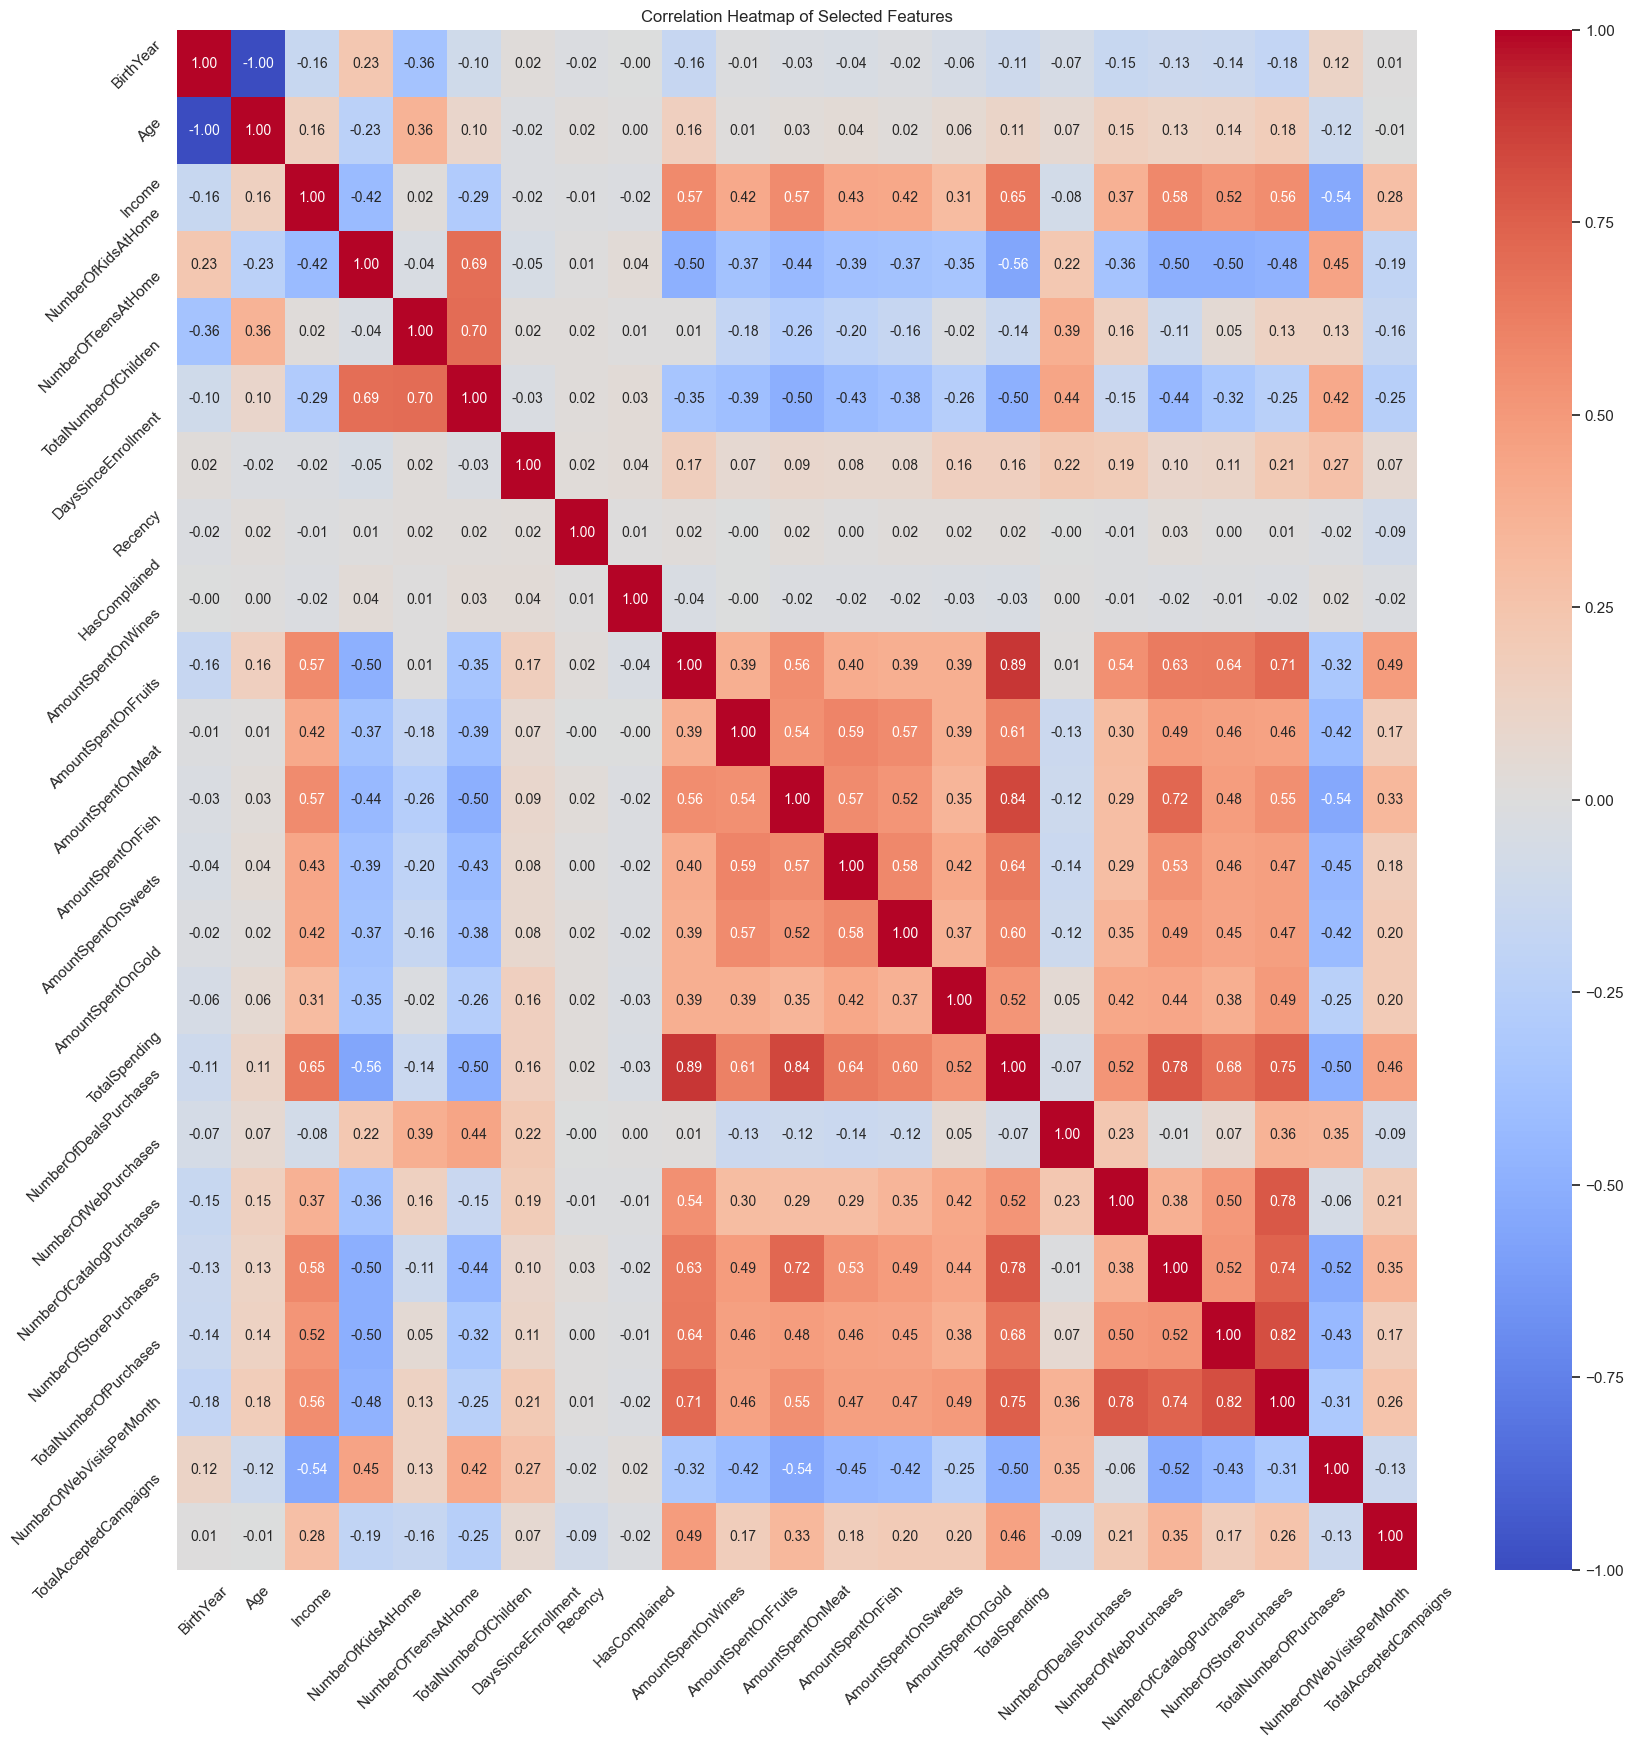

In [46]:
selected_columns = ['CustomerID', 'BirthYear', 'Age', 'Education', 'Marital_Status', 'Income', 'NumberOfKidsAtHome', 'NumberOfTeensAtHome', 'TotalNumberOfChildren', 'EnrollmentDate', 'DaysSinceEnrollment', 'Recency', 'HasComplained', 'AmountSpentOnWines', 'AmountSpentOnFruits', 'AmountSpentOnMeat', 'AmountSpentOnFish', 'AmountSpentOnSweets', 'AmountSpentOnGold', 'TotalSpending', 'NumberOfDealsPurchases', 'NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases', 'TotalNumberOfPurchases', 'NumberOfWebVisitsPerMonth',  'TotalAcceptedCampaigns'] # Add more relevant columns
df_subset = df[selected_columns]

# Correlation matrix for the subset
corr_matrix_subset = df_subset.corr()

# Enhancing readability of the heatmap
sns.set(style="white")
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix_subset, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={'size': 10})
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

C:/Users/USCS/AppData/Local/Temp/xpython_16968/2979753105.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  campaign_corr = df.corr(method='spearman')['TotalAcceptedCampaigns'].sort_values(ascending=False)


TotalAcceptedCampaigns       1.000000
TotalSpending                0.388000
NumberOfCatalogPurchases     0.365215
Income                       0.308295
TotalNumberOfPurchases       0.266825
NumberOfWebPurchases         0.253418
NumberOfStorePurchases       0.173967
DaysSinceEnrollment          0.085035
Age                          0.020817
BirthYear                   -0.020817
HasComplained               -0.023327
NumberOfWebVisitsPerMonth   -0.077135
NumberOfDealsPurchases      -0.092575
Recency                     -0.102491
NumberOfTeensAtHome         -0.146717
NumberOfKidsAtHome          -0.180520
TotalNumberOfChildren       -0.241628
Name: TotalAcceptedCampaigns, dtype: float64


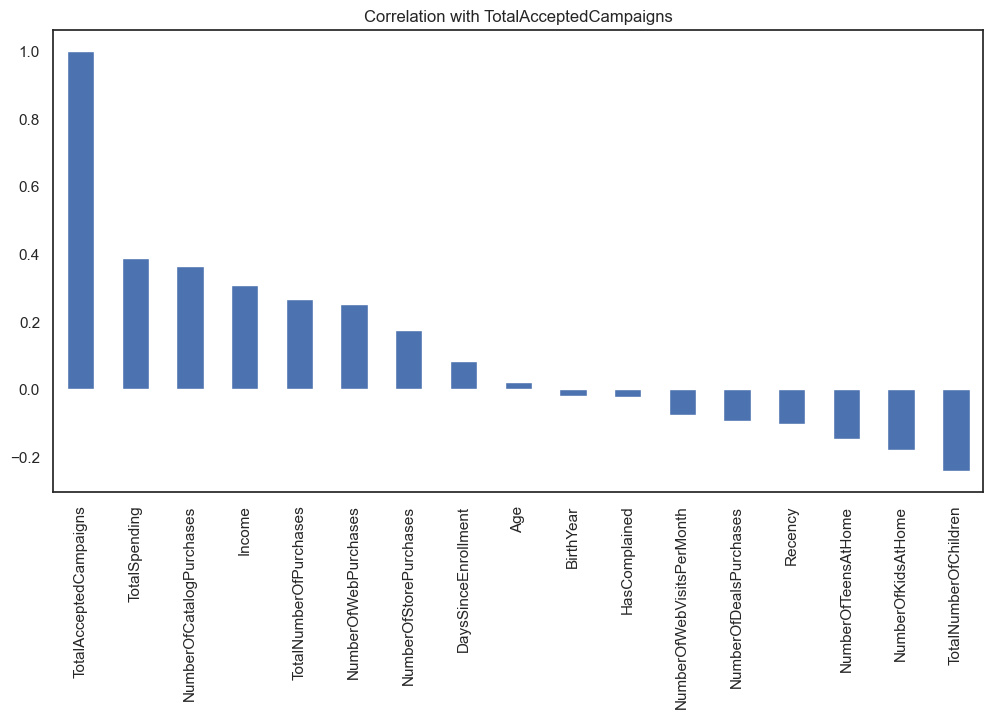

In [47]:
# Correlation with TotalAcceptedCampaigns while ignoring the AcceptedCampaigns features
## THIS IS A BIG MISTAKE BECAUSE THE ACCEPTEDCAMPAIGNS FEATURES ARE CATAGORICAL FEATURE 
## AND NOT NUMERICAL TO BE CALCULATED WITH CORRELATION
campaign_corr = df.corr(method='spearman')['TotalAcceptedCampaigns'].sort_values(ascending=False)
# Drop certain features
features_to_ignore = ['AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 
                      'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedLastCampaign',
                      'AmountSpentOnWines', 'AmountSpentOnFruits', 'AmountSpentOnMeat', 
                      'AmountSpentOnFish', 'AmountSpentOnSweets', 'AmountSpentOnGold']
campaign_corr = campaign_corr.drop(features_to_ignore)
print(campaign_corr)
#preview the campaign_corr in a bar plot
campaign_corr.plot(kind='bar', figsize=(12, 6))
plt.title('Correlation with TotalAcceptedCampaigns')
plt.show()


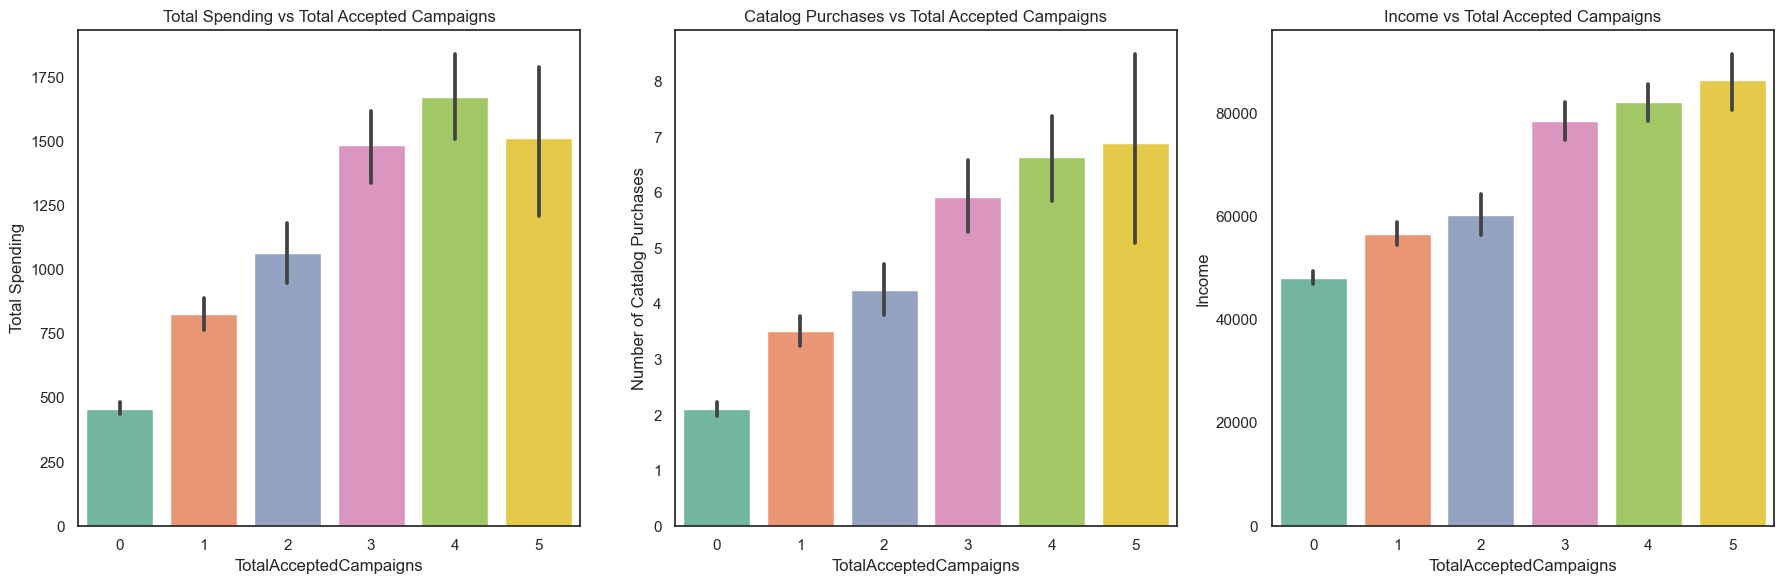

In [48]:
# Create a figure with subplots arranged in 1 row x 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Total Spending vs Total Accepted Campaigns
sns.barplot(ax=axes[0], x='TotalAcceptedCampaigns', y='TotalSpending', data=df, palette='Set2')
axes[0].set_title('Total Spending vs Total Accepted Campaigns')
axes[0].set_ylabel('Total Spending')

# Plot Number of Catalog Purchases vs Total Accepted Campaigns
sns.barplot(ax=axes[1], x='TotalAcceptedCampaigns', y='NumberOfCatalogPurchases', data=df, palette='Set2')
axes[1].set_title('Catalog Purchases vs Total Accepted Campaigns')
axes[1].set_ylabel('Number of Catalog Purchases')

# Plot Income vs Total Accepted Campaigns
sns.barplot(ax=axes[2], x='TotalAcceptedCampaigns', y='Income', data=df, palette='Set2')
axes[2].set_title('Income vs Total Accepted Campaigns')
axes[2].set_ylabel('Income')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

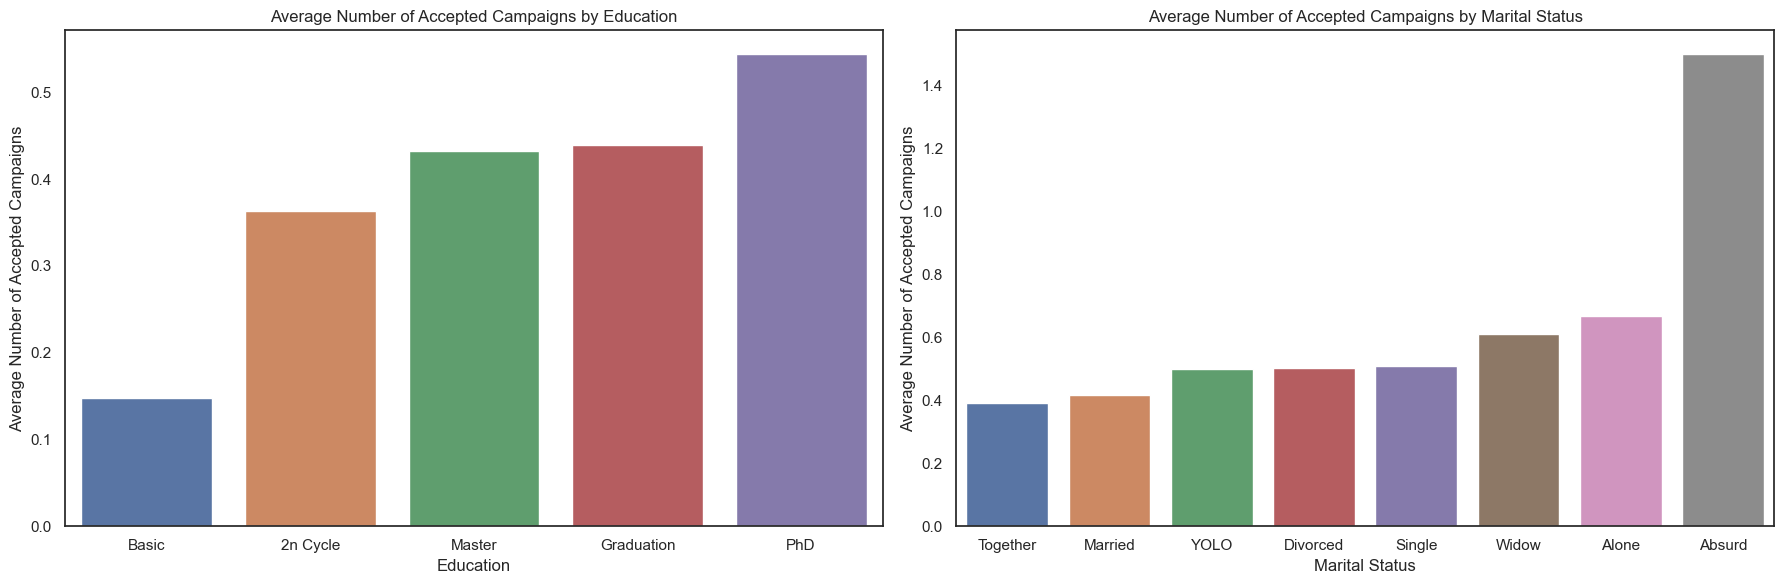

In [49]:
# Grouping by Education and calculating mean TotalAcceptedCampaigns
education_campaigns = df.groupby('Education')['TotalAcceptedCampaigns'].mean().sort_values()

# Grouping by Marital_Status and calculating mean TotalAcceptedCampaigns
marital_campaigns = df.groupby('Marital_Status')['TotalAcceptedCampaigns'].mean().sort_values()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=education_campaigns.index, y=education_campaigns.values, ax=ax[0])
ax[0].set_title('Average Number of Accepted Campaigns by Education')
ax[0].set_xlabel('Education')
ax[0].set_ylabel('Average Number of Accepted Campaigns')

sns.barplot(x=marital_campaigns.index, y=marital_campaigns.values, ax=ax[1])
ax[1].set_title('Average Number of Accepted Campaigns by Marital Status')
ax[1].set_xlabel('Marital Status')
ax[1].set_ylabel('Average Number of Accepted Campaigns')

plt.tight_layout()
plt.show()

In [50]:
#there is a correlation between the number of catalog purchases, total spending, income and the number of accepted campaigns
#this means that: 
#1.Marketing campaigns usually uses catalogs to promote their products
#2.The more the customer spends the more likely he will accept a campaign

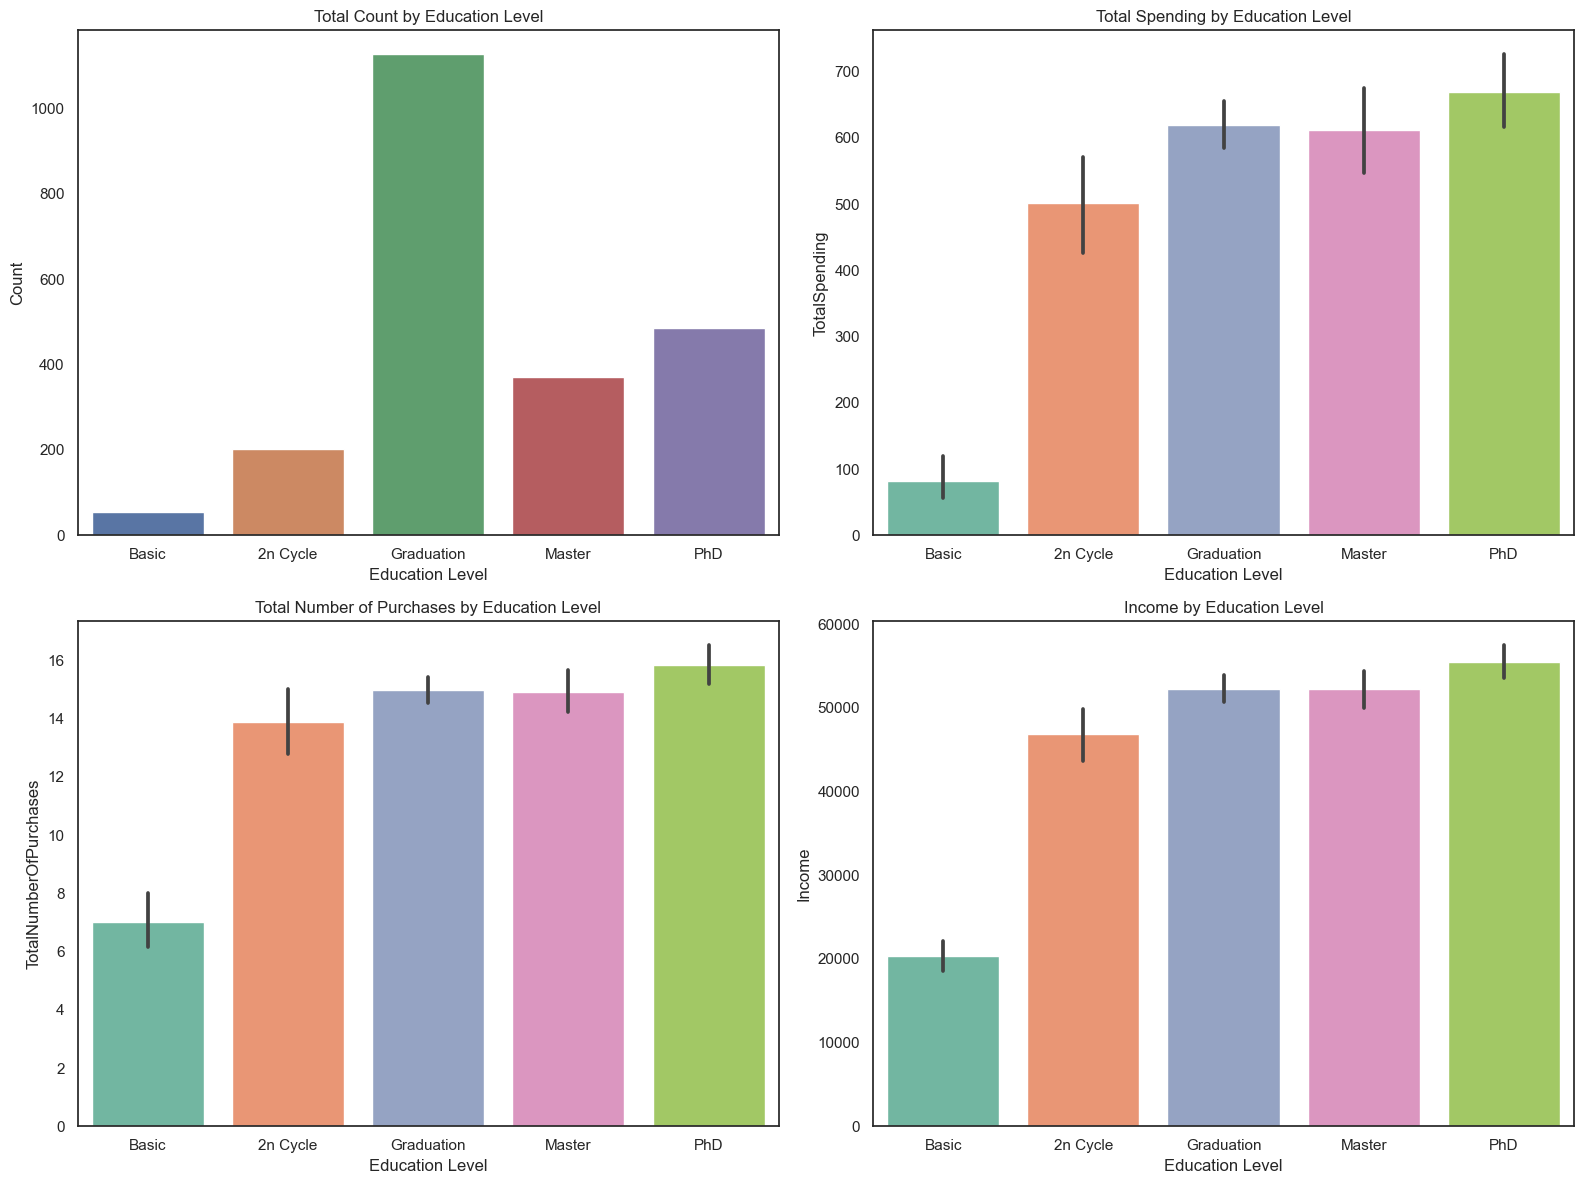

In [51]:
# Define the order of categories
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

# Define the metrics to plot
metrics = [
    ('count', 'Education', None, 'Total Count by Education Level'),
    ('bar', 'Education', 'TotalSpending', 'Total Spending by Education Level'),
    ('bar', 'Education', 'TotalNumberOfPurchases', 'Total Number of Purchases by Education Level'),
    ('bar', 'Education', 'Income', 'Income by Education Level')
]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()  # Flatten the axis array for easy indexing

# Loop through the metrics and create each plot
for i, (kind, x, y, title) in enumerate(metrics):
    ax = axes[i]
    if kind == 'count':
        sns.countplot(x=x, data=df, order=education_order, ax=ax)
    else:
        sns.barplot(x=x, y=y, data=df, palette='Set2', order=education_order, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Education Level')
    if y:
        ax.set_ylabel(y)
    else:
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [52]:
#people with lower education are less likely to spend more money
#people with lower education are less likely to make more purchases
#but one of the potential reason is that the dataset countain less people with lower education

# CLUSTRING
## WOOHOO

## Importing necessary libraries

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [54]:
df.columns

Index(['CustomerID', 'BirthYear', 'Age', 'Education', 'Marital_Status',
       'Income', 'NumberOfKidsAtHome', 'NumberOfTeensAtHome',
       'TotalNumberOfChildren', 'EnrollmentDate', 'DaysSinceEnrollment',
       'Recency', 'HasComplained', 'AmountSpentOnWines', 'AmountSpentOnFruits',
       'AmountSpentOnMeat', 'AmountSpentOnFish', 'AmountSpentOnSweets',
       'AmountSpentOnGold', 'TotalSpending', 'NumberOfDealsPurchases',
       'NumberOfWebPurchases', 'NumberOfCatalogPurchases',
       'NumberOfStorePurchases', 'TotalNumberOfPurchases',
       'NumberOfWebVisitsPerMonth', 'AcceptedCampaign1', 'AcceptedCampaign2',
       'AcceptedCampaign3', 'AcceptedCampaign4', 'AcceptedCampaign5',
       'AcceptedLastCampaign', 'TotalAcceptedCampaigns'],
      dtype='object')

## Preprocessing

In [55]:
# Define categorical and numerical columns again due to the reset
categorical_cols = ['Marital_Status']
numerical_cols = df.select_dtypes(include=['int64']).columns.tolist()

# Remove non-numeric columns and columns not useful for clustering
non_numeric_cols = ['CustomerID', 'BirthYear', 'EnrollmentDate', 'Age', 
                    'NumberOfKidsAtHome', 'NumberOfTeensAtHome', 'DaysSinceEnrollment', 'HasComplained', 'Recency']
numerical_cols = [col for col in numerical_cols if col not in non_numeric_cols]
# Create the preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps into a single ColumnTransformer pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Apply the ColumnTransformer to our data
data_prepared = preprocessor.fit_transform(df)

# The result is a NumPy array. Let's convert it to a DataFrame for better readability
# Get feature names from onehot encoder
onehot_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()
all_features = numerical_cols + onehot_features.tolist()

# Create a DataFrame with the transformed features
data_prepared_df = pd.DataFrame(data_prepared, columns=all_features)

data_prepared_df.head()

,Income,TotalNumberOfChildren,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns,x0_Absurd,x0_Alone,x0_Divorced,x0_Married,x0_Single,x0_Together,x0_Widow,x0_YOLO
0,0.252324,-1.264618,0.983671,1.554623,1.680253,2.461700,1.475877,0.846061,1.680649,0.348371,1.408080,2.510435,-0.552077,1.319785,0.692882,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,2.386966,0.620785,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.208211,1.395420,-0.870717,-0.636422,-0.713250,-0.650275,-0.631440,-0.729569,-0.961838,-0.169096,-1.110957,-0.568802,-1.167421,-1.155824,-0.131574,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.778499,-1.264618,0.362570,0.572430,-0.176928,1.345050,-0.147000,-0.037829,0.282956,-0.686563,1.408080,-0.226664,1.293956,0.798604,-0.543802,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.977384,0.065401,-0.870717,-0.560868,-0.651196,-0.503829,-0.582996,-0.748784,-0.918627,-0.169096,-0.751094,-0.910939,-0.552077,-0.895234,0.280654,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.258376,0.065401,-0.389289,0.421324,-0.216820,0.155177,-0.001667,-0.556634,-0.305371,1.383304,0.328493,0.115473,0.063267,0.538014,-0.131574,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Applying the Elbow Method 

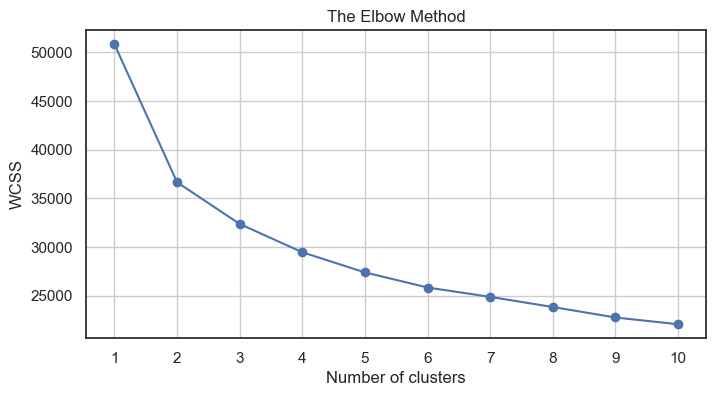

In [56]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=42)
    kmeans.fit(data_prepared_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


## Applying the silhouette score

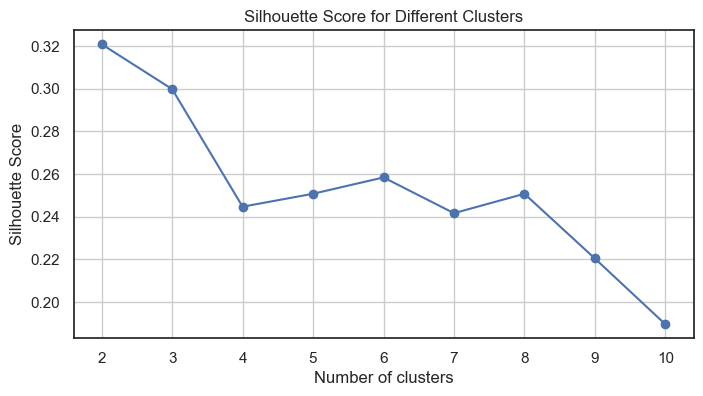

In [57]:
silhouette_scores = []
for k in range(2, 11):  # Silhouette Score is not defined for a single cluster
    kmeans = KMeans(n_clusters=k, init='k-means++',n_init=10, random_state=42)
    cluster_labels=kmeans.fit(data_prepared_df).labels_
    score = silhouette_score(data_prepared_df, cluster_labels)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, '-o')
plt.title('Silhouette Score for Different Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

## Applying k-means

### 2-clusters

In [58]:
# K-Means for 2 clusters
kmeans_2 = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
clusters_2 = kmeans_2.fit_predict(data_prepared_df)

# Add the cluster labels to your dataframe
df['Cluster_2'] = clusters_2


### 3-clusters

In [59]:
# K-Means for 3 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
clusters_3 = kmeans_3.fit_predict(data_prepared_df)

# Add the cluster labels to your dataframe
df['Cluster_3'] = clusters_3


In [60]:
# Analyze the clusters for 2-cluster solution
cluster_analysis_2 = df.groupby('Cluster_2').mean()

# Analyze the clusters for 3-cluster solution
cluster_analysis_3 = df.groupby('Cluster_3').mean()

C:/Users/USCS/AppData/Local/Temp/xpython_16968/4290778911.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis_2 = df.groupby('Cluster_2').mean()
C:/Users/USCS/AppData/Local/Temp/xpython_16968/4290778911.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis_3 = df.groupby('Cluster_3').mean()


In [61]:
# Silhouette score for 2 clusters
silhouette_avg_2 = silhouette_score(data_prepared_df, clusters_2)
print(f"The average silhouette score for 2 clusters is: {silhouette_avg_2}")

# Silhouette score for 3 clusters
silhouette_avg_3 = silhouette_score(data_prepared_df, clusters_3)
print(f"The average silhouette score for 3 clusters is: {silhouette_avg_3}")

The average silhouette score for 2 clusters is: 0.32081939617173943
The average silhouette score for 3 clusters is: 0.29978647323476826


In [62]:
cluster_analysis_2.sort_values(by='TotalSpending', ascending=False)

,BirthYear,Age,Income,NumberOfKidsAtHome,NumberOfTeensAtHome,TotalNumberOfChildren,DaysSinceEnrollment,Recency,HasComplained,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns,Cluster_3
Cluster_2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1967.212458,46.787542,71401.895439,0.081201,0.428254,0.509455,379.590656,49.501669,0.007786,609.559511,55.429366,360.363737,78.678532,57.413793,75.822024,1237.266963,2.081201,5.822024,5.318131,8.575083,21.796440,3.759733,0.152392,0.031146,0.084538,0.140156,0.1802,0.234705,0.823137,1.773081
1,1970.036622,43.963378,38422.459641,0.688341,0.559043,1.247384,336.455157,48.837818,0.009716,98.687593,6.678625,36.940209,9.870703,6.680120,22.566517,181.423767,2.491779,2.921525,0.878176,3.926009,10.217489,6.366966,0.005232,0.001495,0.065022,0.030643,0.0000,0.091928,0.194320,0.145740


In [63]:
cluster_analysis_3.sort_values(by='TotalSpending', ascending=False)

,BirthYear,Age,Income,NumberOfKidsAtHome,NumberOfTeensAtHome,TotalNumberOfChildren,DaysSinceEnrollment,Recency,HasComplained,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns,Cluster_2
Cluster_3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1969.297561,44.702439,79236.634146,0.048780,0.175610,0.224390,359.887805,47.590244,0.004878,852.443902,55.219512,456.746341,79.385366,63.243902,75.487805,1582.526829,1.234146,5.512195,5.960976,8.185366,20.892683,3.302439,0.507317,0.136585,0.165854,0.400000,0.765854,0.604878,2.580488,0.014634
2,1966.539141,47.460859,67667.167929,0.119949,0.545455,0.665404,382.340909,49.672980,0.007576,515.906566,50.926768,302.141414,72.147727,51.162879,73.425505,1065.710859,2.540404,5.952020,4.785354,8.551768,21.829545,4.108586,0.045455,0.000000,0.058081,0.066919,0.006313,0.117424,0.294192,0.121212
0,1970.345161,43.654839,36906.167742,0.716935,0.536290,1.253226,334.546774,48.991935,0.010484,77.975000,5.736290,32.632258,8.487097,5.699194,19.943548,150.473387,2.370968,2.660484,0.761290,3.637903,9.430645,6.425806,0.003226,0.001613,0.066935,0.025806,0.000000,0.094355,0.191935,0.999194


In [69]:
df[df['Cluster_3']==1]

,CustomerID,BirthYear,Age,Education,Marital_Status,Income,NumberOfKidsAtHome,NumberOfTeensAtHome,TotalNumberOfChildren,EnrollmentDate,DaysSinceEnrollment,Recency,HasComplained,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns,Cluster_2,Cluster_3
15,2114,1946,68,PhD,Single,82800,0,0,0,2012-11-24,582,23,0,1006,22,115,59,68,45,1315,1,7,6,12,26,3,1,0,0,0,1,1,3,0,1
29,1966,1965,49,PhD,Married,84618,0,0,0,2013-11-22,219,96,0,684,100,801,21,66,0,1672,1,6,9,10,26,2,0,0,0,0,1,0,1,0,1
53,2225,1977,37,Graduation,Divorced,82582,0,0,0,2014-06-07,22,54,0,510,120,550,156,40,241,1617,1,4,9,7,21,1,1,0,1,0,0,1,3,0,1
55,6260,1955,59,Master,Together,82384,0,0,0,2012-11-19,587,55,0,984,51,432,180,120,190,1957,1,3,10,13,27,1,0,0,0,0,1,1,2,0,1
60,6853,1982,32,Master,Single,75777,0,0,0,2013-07-04,360,12,0,712,26,538,69,13,80,1438,1,3,6,11,21,1,0,0,0,1,1,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,2829,1955,59,Graduation,Married,65210,0,1,1,2014-03-10,111,25,0,626,0,70,0,7,28,731,2,9,3,8,22,6,1,0,0,1,0,0,2,0,1
2175,1772,1975,39,PhD,Married,79174,0,0,0,2013-01-11,534,2,0,1074,37,518,193,92,129,2043,1,5,6,7,19,2,1,0,0,0,1,1,3,0,1
2187,5721,1956,58,PhD,Married,84117,0,0,0,2014-05-11,49,60,0,611,76,749,59,45,26,1566,1,7,10,6,24,2,0,0,0,0,1,0,1,0,1
2193,8722,1957,57,2n Cycle,Married,82347,0,0,0,2012-11-06,600,38,0,556,54,845,202,133,63,1853,1,7,7,10,25,3,1,0,1,0,0,1,3,0,1


## Hierarchical Clustering: Agglomerative Clustering

In [64]:
data_prepared_df

,Income,TotalNumberOfChildren,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns,x0_Absurd,x0_Alone,x0_Divorced,x0_Married,x0_Single,x0_Together,x0_Widow,x0_YOLO
0,0.252324,-1.264618,0.983671,1.554623,1.680253,2.461700,1.475877,0.846061,1.680649,0.348371,1.408080,2.510435,-0.552077,1.319785,0.692882,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,2.386966,0.620785,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.208211,1.395420,-0.870717,-0.636422,-0.713250,-0.650275,-0.631440,-0.729569,-0.961838,-0.169096,-1.110957,-0.568802,-1.167421,-1.155824,-0.131574,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.778499,-1.264618,0.362570,0.572430,-0.176928,1.345050,-0.147000,-0.037829,0.282956,-0.686563,1.408080,-0.226664,1.293956,0.798604,-0.543802,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.977384,0.065401,-0.870717,-0.560868,-0.651196,-0.503829,-0.582996,-0.748784,-0.918627,-0.169096,-0.751094,-0.910939,-0.552077,-0.895234,0.280654,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.258376,0.065401,-0.389289,0.421324,-0.216820,0.155177,-0.001667,-0.556634,-0.305371,1.383304,0.328493,0.115473,0.063267,0.538014,-0.131574,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0.372788,0.065401,1.203582,0.421324,0.066855,0.081954,2.202538,3.901246,1.221953,-0.169096,1.767943,0.115473,-0.552077,0.407719,-0.131574,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2233,0.481772,2.725440,0.303134,-0.661606,-0.606872,-0.686886,-0.655663,-0.691139,-0.268808,2.418238,1.408080,-0.226664,-0.244405,0.928900,0.692882,3.812443,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,0.620785,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2234,0.207145,-1.264618,1.794966,0.547246,0.221989,-0.101103,-0.364998,-0.383699,1.055759,-0.686563,-0.751094,0.115473,2.216972,0.538014,0.280654,-0.262299,-0.11659,-0.280343,3.520683,-0.279414,-0.418942,0.620785,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2235,0.686033,0.065401,0.368513,0.093927,0.208692,0.777572,0.070999,0.327256,0.394307,-0.169096,0.688356,0.799748,1.293956,1.059195,-0.956029,-0.262299,-0.11659,-0.280343,-0.284036,-0.279414,-0.418942,-0.501847,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
